In [1]:
import pandas as pd

df = pd.read_parquet('./2.atributos.parquet')

In [2]:
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'cod_regiao_saude',
       'nome_regiao_saude', 'data', 'semana_epi', 'populacao_tcu_2019',
       'casos_acumulados', 'casos_novos', 'obitos_acumulados', 'obitos_novos',
       'interior_metropolitana', 'novos_casos_novos', 'novos_casos_acumulados',
       'ano', 'mes', 'mes_numerico', 'mes_traduzido', 'dia_semana',
       'dia_semana_traduzido', 'dia_semana_numerico', 'estacao'],
      dtype='object')

# Filtrar período

In [3]:
df = df[(df.data >= '03-01-2020') & (df.data < '03-01-2021')]

# Filtrar região

In [4]:
df = df[df.regiao == 'Sudeste']

# Normalizar dados por 100.000 hab

In [5]:
df['incidencia'] = df['novos_casos_novos'] / df['populacao_tcu_2019'] * 100_000
df[['data', 'municipio', 'incidencia', 'novos_casos_novos', 'populacao_tcu_2019']]

,data,municipio,incidencia,novos_casos_novos,populacao_tcu_2019
1849,2020-03-27,Abadia dos Dourados,0.0,0,6989.0
1850,2020-03-28,Abadia dos Dourados,0.0,0,6989.0
1851,2020-03-29,Abadia dos Dourados,0.0,0,6989.0
1852,2020-03-30,Abadia dos Dourados,0.0,0,6989.0
1853,2020-03-31,Abadia dos Dourados,0.0,0,6989.0
...,...,...,...,...,...
10297415,2021-02-24,Óleo,0.0,0,2496.0
10297416,2021-02-25,Óleo,0.0,0,2496.0
10297417,2021-02-26,Óleo,0.0,0,2496.0
10297418,2021-02-27,Óleo,0.0,0,2496.0


In [6]:
df['mortalidade'] = df['obitos_novos'] / df['populacao_tcu_2019'] * 100_000
df[['data', 'municipio', 'mortalidade', 'obitos_novos', 'populacao_tcu_2019']]

,data,municipio,mortalidade,obitos_novos,populacao_tcu_2019
1849,2020-03-27,Abadia dos Dourados,0.0,0,6989.0
1850,2020-03-28,Abadia dos Dourados,0.0,0,6989.0
1851,2020-03-29,Abadia dos Dourados,0.0,0,6989.0
1852,2020-03-30,Abadia dos Dourados,0.0,0,6989.0
1853,2020-03-31,Abadia dos Dourados,0.0,0,6989.0
...,...,...,...,...,...
10297415,2021-02-24,Óleo,0.0,0,2496.0
10297416,2021-02-25,Óleo,0.0,0,2496.0
10297417,2021-02-26,Óleo,0.0,0,2496.0
10297418,2021-02-27,Óleo,0.0,0,2496.0


# Adicionar porte no municipio

In [7]:
def adicionar_porte_municipio(row):
  if row < 10_000:
    return "Pequeno I"
  
  if row >= 10_000 and row < 50_000:
    return "Pequeno II"
  
  if row >= 50_000 and row < 100_000:
    return "Médio"
  
  if row >= 100_000 and row < 500_000:
    return "Grande"
  
  return "Metrópole"

df['porte_municipio'] = df['populacao_tcu_2019'].apply(adicionar_porte_municipio)

# Gráficos

# Boxplot

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot(y):
  order = ['Pequeno I', 'Pequeno II', 'Médio', 'Grande', 'Metrópole']
  estados = ["ES", "MG", "SP", "RJ"]

  fig, ax = plt.subplots(2, 2, figsize=(12, 10))
  ax = ax.ravel()

  for i in range(len(estados)):
      estado = estados[i]
      df_filtered = df[df.estado == estado]
      sns.boxplot(data=df_filtered, 
                  x='porte_municipio', 
                  y=y, 
                  order=order, 
                  ax=ax[i]).set_title(estado)

  plt.tight_layout()
  plt.show()

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def line(y):
  estados = ["ES", "MG", "SP", "RJ"]

  capitais = {
    "ES": "Vitória",
    "MG": "Belo Horizonte",
    "SP": "São Paulo",
    "RJ": "Rio de Janeiro"
  }

  fig, ax = plt.subplots(2, 2, figsize=(12, 10))
  ax = ax.ravel()

  for i in range(len(estados)):
      estado = estados[i]
      capital = capitais[estado]

      # Capital
      df_filtered = df[df.municipio == capital]
      sns.lineplot(data=df_filtered, 
                  x='data', 
                  y=y, 
                  ax=ax[i],
                  color='blue').set_title(estado)
    
      # Média do Estado
      df_filtered = df[df.estado == estado]
      df_filtered = df.groupby(['data'])[y].mean().reset_index()
      sns.lineplot(data=df_filtered, 
                  x='data', 
                  y=y, 
                  ax=ax[i],
                  color='orange').set_title(estado)
                

  plt.tight_layout()

## Gráfico 1

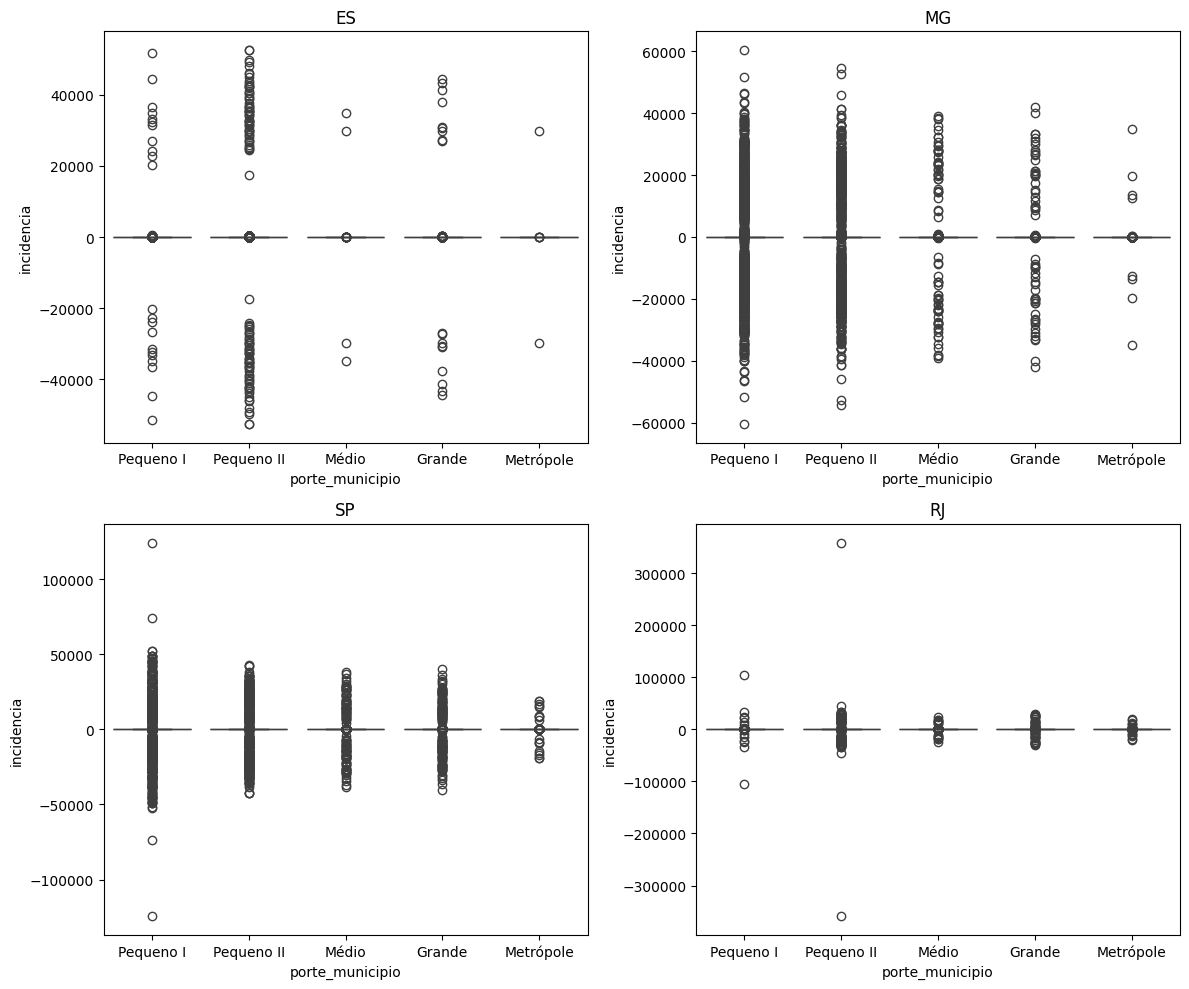

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

boxplot('incidencia')

# Gráfico 2

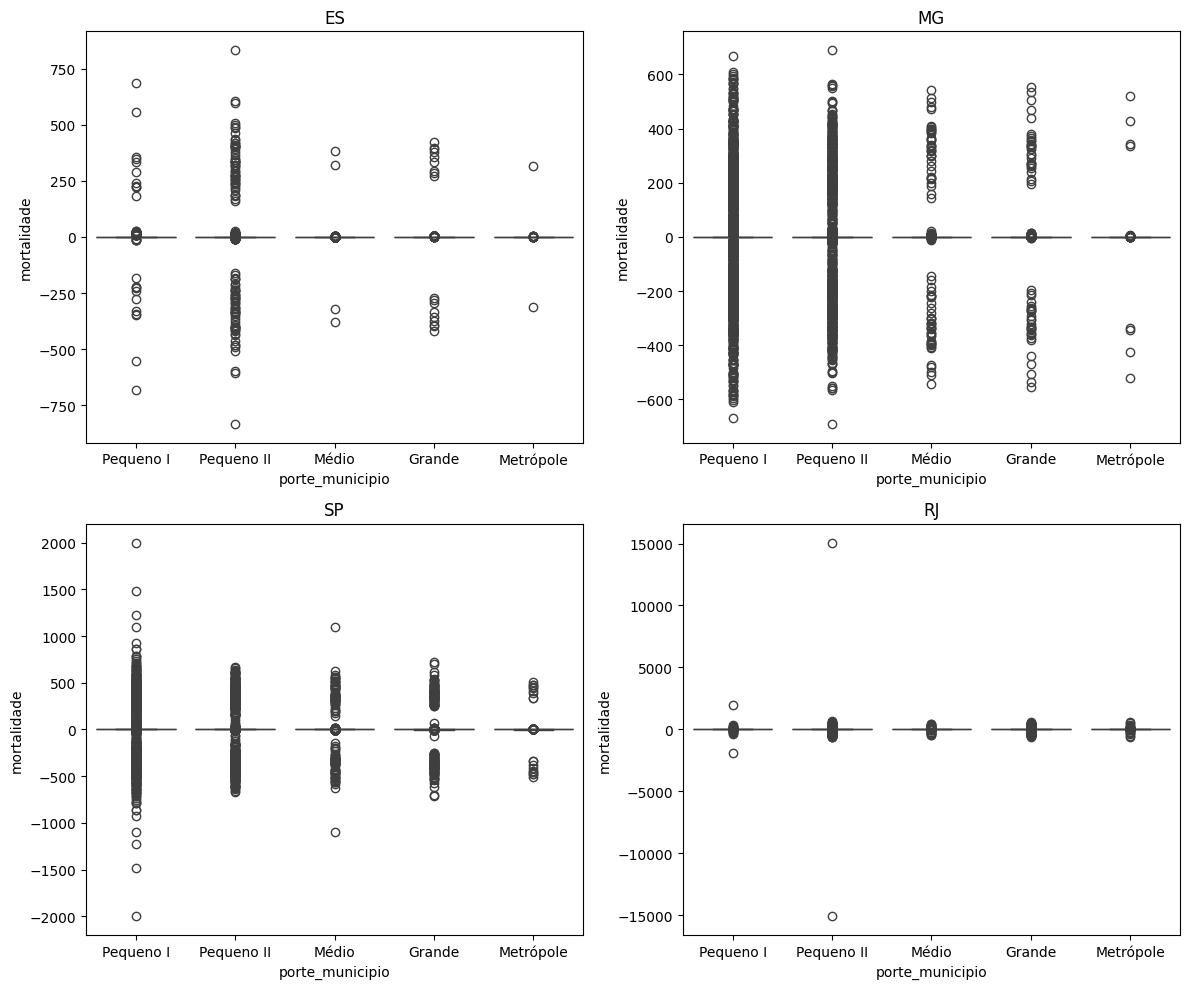

In [11]:
boxplot('mortalidade')

# Gráfico 3

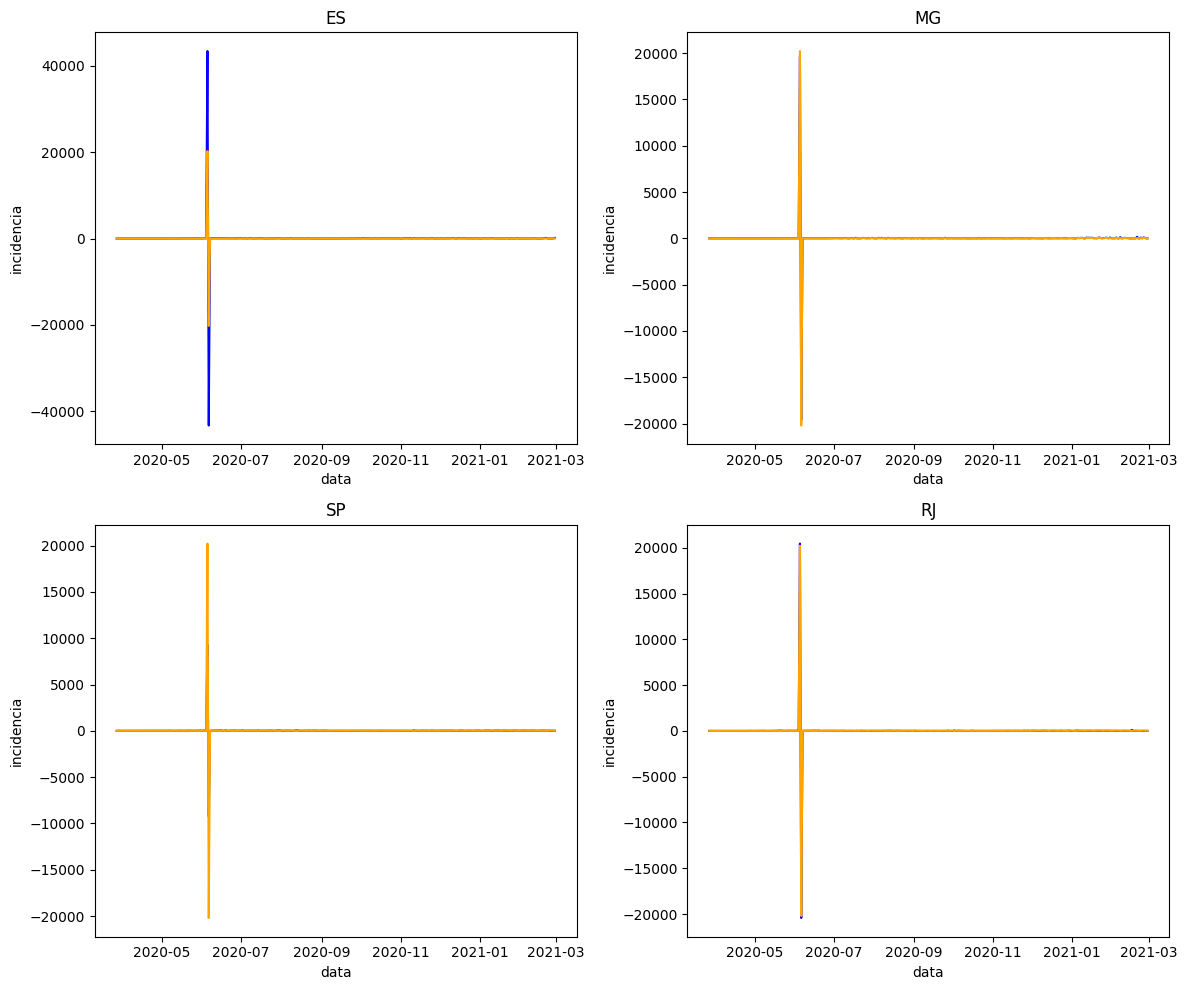

In [42]:
line('incidencia')

# Gráfico 4

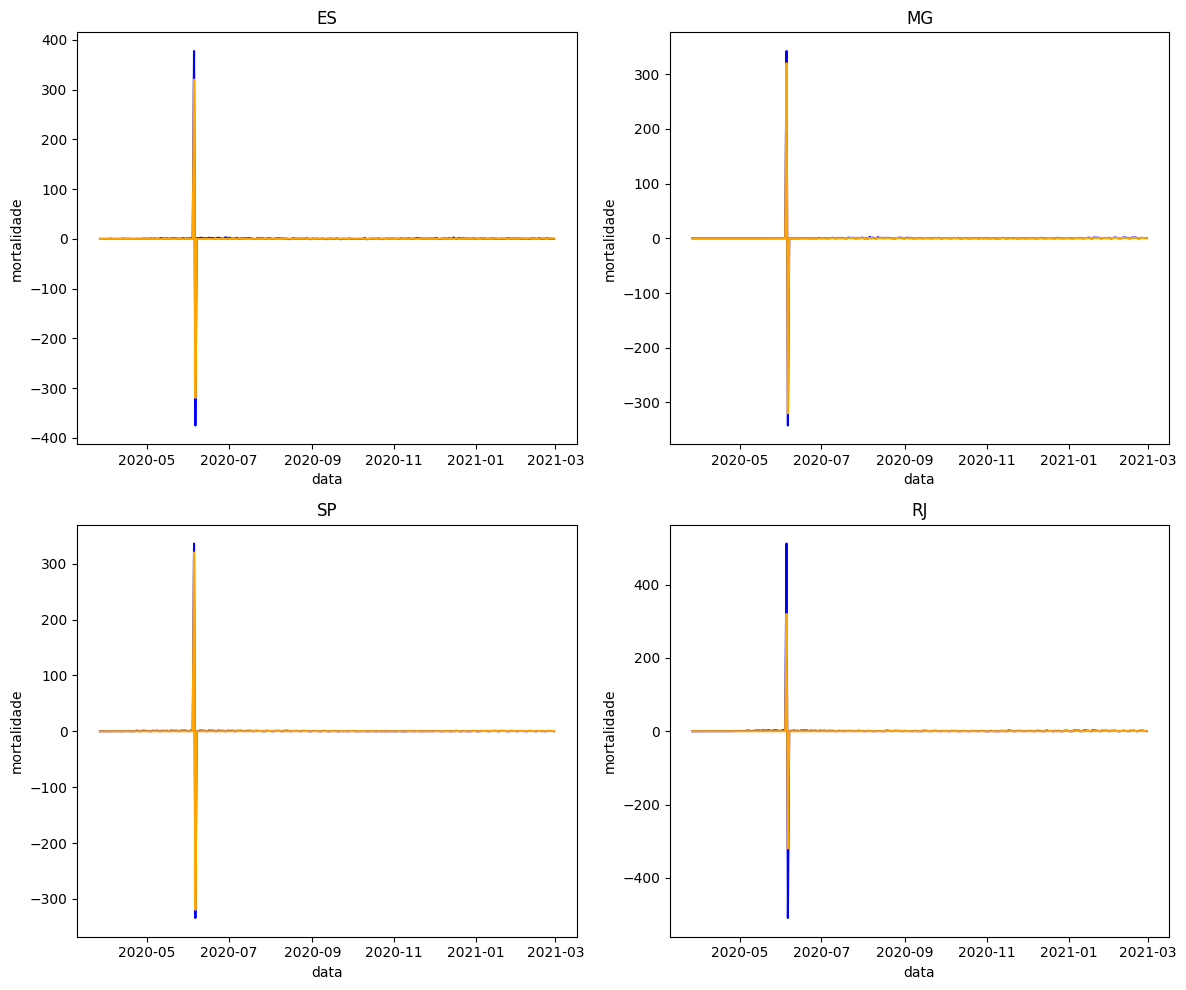

In [43]:
line('mortalidade')